## 70-30 data split 


### Data preprocessing


In [0]:
import sklearn as sk
import numpy as np
from zipfile import ZipFile

file = ZipFile('att_faces.zip')
file.extractall()
file.close()

In [0]:
from matplotlib import pyplot as pyplt 
folder = 1
file = 1
data = []
for i in range(1,41):
    for j in range(1,11):
        data.append(pyplt.imread("att_faces/"+ "orl_faces/" + "s" + str(i) + "/"+str(j)+".pgm"))

for i in range(0,400):
    data[i] = data[i].reshape(10304)

df = np.array(data)

In [0]:
labels = []
for i in range(1,41):
    for j in range(1,11):
        labels.append(i)

In [0]:
X_train_70 = list()
Y_train_70 = list()

X_test_30 = list()
Y_test_30 = list()

for i in range(0, 400, 10):
  for j in range (0, 7):
    X_train_70.append(df[i+j])
    Y_train_70.append(labels[i+j])
  for k in range(7, 10):
    X_test_30.append(df[i+k])
    Y_test_30.append(labels[i+k])

In [0]:
X_train_70 = np.array(X_train_70)
Y_train_70 = np.array(Y_train_70)

X_test_30 = np.array(X_test_30)
Y_test_30 = np.array(Y_test_30)

print('Training data size = ', X_train_70.shape)
print('Training data: \n', X_train_70)
print('Training labels: \n', Y_train_70)

print('Test data size = ', X_test_30.shape)



Training data size =  (280, 10304)
Training data: 
 [[ 48  49  45 ...  47  46  46]
 [ 60  60  62 ...  32  34  34]
 [ 39  44  53 ...  29  26  29]
 ...
 [128 125 125 ...  85  90  84]
 [123 121 126 ...  40  35  42]
 [129 127 133 ...  93  93  93]]
Training labels: 
 [ 1  1  1  1  1  1  1  2  2  2  2  2  2  2  3  3  3  3  3  3  3  4  4  4
  4  4  4  4  5  5  5  5  5  5  5  6  6  6  6  6  6  6  7  7  7  7  7  7
  7  8  8  8  8  8  8  8  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11
 11 11 11 11 11 12 12 12 12 12 12 12 13 13 13 13 13 13 13 14 14 14 14 14
 14 14 15 15 15 15 15 15 15 16 16 16 16 16 16 16 17 17 17 17 17 17 17 18
 18 18 18 18 18 18 19 19 19 19 19 19 19 20 20 20 20 20 20 20 21 21 21 21
 21 21 21 22 22 22 22 22 22 22 23 23 23 23 23 23 23 24 24 24 24 24 24 24
 25 25 25 25 25 25 25 26 26 26 26 26 26 26 27 27 27 27 27 27 27 28 28 28
 28 28 28 28 29 29 29 29 29 29 29 30 30 30 30 30 30 30 31 31 31 31 31 31
 31 32 32 32 32 32 32 32 33 33 33 33 33 33 33 34 34 34 34 34 34 34 35 35
 35 35 

### PCA


In [0]:
mean_bonus = np.mean(X_train_70, axis=0)
print(mean_bonus)

Z_train_70 = X_train_70 - mean_bonus
Z_test_30 = X_test_30 - mean_bonus

print(Z_train_70.shape)

[85.41071429 85.33928571 85.65357143 ... 74.75714286 74.16785714
 73.35714286]
(280, 10304)


In [0]:
sigma_bonus = np.cov(Z_train_70, rowvar=False, bias = True)
print(sigma_bonus)
print('\n')
print(sigma_bonus.shape)

[[1267.49917092 1256.57493622 1253.02442602 ... -140.0002551
  -106.5653699   -31.9002551 ]
 [1256.57493622 1263.58131378 1254.41753827 ... -128.58903061
   -97.08909439  -26.49260204]
 [1253.02442602 1254.41753827 1261.3621301  ... -141.4519898
  -106.9311352   -40.87270408]
 ...
 [-140.0002551  -128.58903061 -141.4519898  ... 2116.91959184
  1902.00505102 1721.19744898]
 [-106.5653699   -97.08909439 -106.9311352  ... 1902.00505102
  1949.46825255 1776.56862245]
 [ -31.9002551   -26.49260204  -40.87270408 ... 1721.19744898
  1776.56862245 1838.76530612]]


(10304, 10304)


In [0]:
eigValues_bonus, eigVectors_bonus = np.linalg.eigh(sigma_bonus)

print(eigValues_bonus)
print('\n')
print(eigValues_bonus.shape)
print('\n')
print(eigVectors_bonus)
print('\n')
print(eigVectors_bonus.shape)

[-2.28054694e-09 -1.34576419e-09 -1.23398558e-09 ...  1.13179252e+06
  2.03423818e+06  2.92654670e+06]


(10304,)


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.09465553e-02
   1.41719617e-02 -4.03871238e-03]
 [ 2.91689965e-01  5.40522848e-01 -2.46382253e-01 ...  2.10192175e-02
   1.42257245e-02 -4.04217769e-03]
 [-5.67380501e-01 -4.23003671e-02 -5.28613804e-02 ...  2.08946981e-02
   1.42574846e-02 -4.08664318e-03]
 ...
 [ 5.56529623e-05 -1.71546305e-02 -2.97584885e-02 ...  1.13025325e-02
  -1.21382248e-02 -5.59091108e-03]
 [ 7.72023134e-03 -6.10434058e-04  1.61336344e-02 ...  1.17586032e-02
  -1.14827693e-02 -5.40220614e-03]
 [-1.23808394e-02  1.80617833e-02  3.17304116e-02 ...  1.25482658e-02
  -1.02106759e-02 -6.38070565e-03]]


(10304, 10304)


In [0]:
eigPairs_bonus = list()

for i in range (0, len(eigValues_bonus)):
    eigPairs_bonus.append([ np.abs(eigValues_bonus[i]), eigVectors_bonus[:,i] ])

def sortKey(myList):
  return myList[0]

eigPairs_bonus.sort(key = sortKey, reverse = True)

In [0]:
sumOfEigVal = 0
for e in eigValues_bonus:
  sumOfEigVal = sumOfEigVal + e
  
print(Z_train_70.shape)


(280, 10304)


alpha =  0.8
Projection matrix size =  (38, 10304)
Projection matrix =  [[-0.00403871 -0.00404218 -0.00408664 ... -0.00559091 -0.00540221
  -0.00638071]
 [ 0.01417196  0.01422572  0.01425748 ... -0.01213822 -0.01148277
  -0.01021068]
 [ 0.02094656  0.02101922  0.0208947  ...  0.01130253  0.0117586
   0.01254827]
 ...
 [ 0.00447165  0.00486684  0.00440921 ... -0.00763892 -0.00589442
  -0.00711938]
 [-0.0004394   0.00152871  0.00118539 ...  0.0167669   0.01468214
   0.00572593]
 [ 0.00513232  0.00185733  0.00204955 ... -0.00390004 -0.00121548
   0.00129434]]
Variance explained =  12853831.873471769

k =  1
-------
Accuracy: 
0.9583333333333334
confusion matrix: 

[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]
Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.0

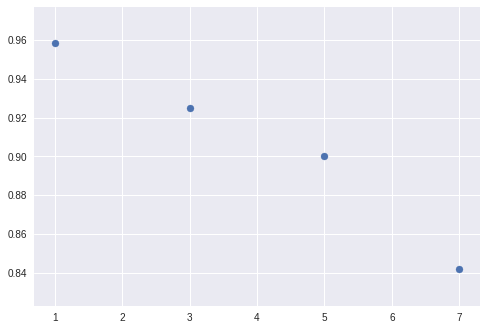

-------------------------------------------------------------------------------------------------------------

alpha =  0.85
Projection matrix size =  (56, 10304)
Projection matrix =  [[-0.00403871 -0.00404218 -0.00408664 ... -0.00559091 -0.00540221
  -0.00638071]
 [ 0.01417196  0.01422572  0.01425748 ... -0.01213822 -0.01148277
  -0.01021068]
 [ 0.02094656  0.02101922  0.0208947  ...  0.01130253  0.0117586
   0.01254827]
 ...
 [ 0.00569886  0.00355638  0.00395549 ... -0.00626165 -0.00326532
  -0.01053814]
 [-0.00323306 -0.00342577 -0.00310383 ... -0.01756876 -0.01455249
  -0.01438163]
 [-0.0006264  -0.00036727 -0.00071043 ...  0.00580764  0.00625421
   0.01168105]]
Variance explained =  13633636.933779977

k =  1
-------
Accuracy: 
0.9666666666666667
confusion matrix: 

[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]
Classification report: 

              precision    recall  f1-score   support

           1      

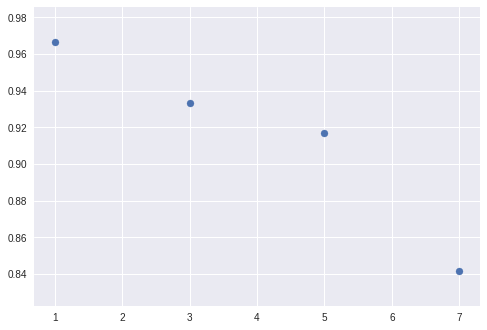

-------------------------------------------------------------------------------------------------------------

alpha =  0.9
Projection matrix size =  (88, 10304)
Projection matrix =  [[-0.00403871 -0.00404218 -0.00408664 ... -0.00559091 -0.00540221
  -0.00638071]
 [ 0.01417196  0.01422572  0.01425748 ... -0.01213822 -0.01148277
  -0.01021068]
 [ 0.02094656  0.02101922  0.0208947  ...  0.01130253  0.0117586
   0.01254827]
 ...
 [ 0.00376357  0.00468208  0.004181   ... -0.00391309 -0.00411429
  -0.01477384]
 [-0.0052156  -0.00852954 -0.00845991 ...  0.00092763  0.00455502
   0.00890313]
 [ 0.00207018 -0.00192387 -0.0006791  ...  0.02292769  0.01836623
   0.01204768]]
Variance explained =  14457898.46343395

k =  1
-------
Accuracy: 
0.9666666666666667
confusion matrix: 

[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]
Classification report: 

              precision    recall  f1-score   support

           1       1

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


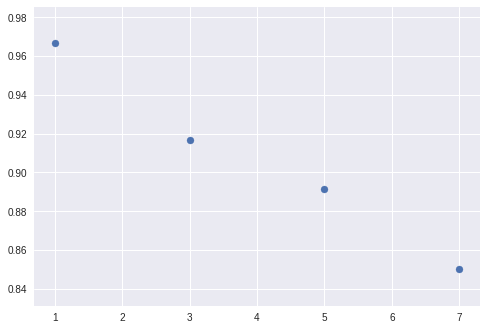

-------------------------------------------------------------------------------------------------------------

alpha =  0.95
Projection matrix size =  (144, 10304)
Projection matrix =  [[-0.00403871 -0.00404218 -0.00408664 ... -0.00559091 -0.00540221
  -0.00638071]
 [ 0.01417196  0.01422572  0.01425748 ... -0.01213822 -0.01148277
  -0.01021068]
 [ 0.02094656  0.02101922  0.0208947  ...  0.01130253  0.0117586
   0.01254827]
 ...
 [ 0.00065921  0.00200713  0.00481198 ...  0.00683468 -0.00139349
  -0.02752453]
 [ 0.00932296  0.01170862  0.00882983 ...  0.0341193   0.01116673
   0.00652372]
 [-0.00808999 -0.00753516 -0.00401862 ...  0.0078466   0.02033722
   0.00542328]]
Variance explained =  15265322.487598052

k =  1
-------
Accuracy: 
0.95
confusion matrix: 

[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]
Classification report: 

              precision    recall  f1-score   support

           1       1.00      1.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


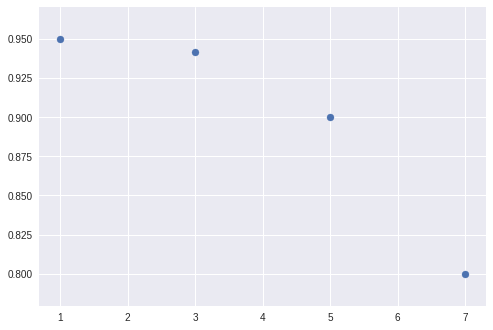

-------------------------------------------------------------------------------------------------------------



In [0]:
alpha = [0.8, 0.85, 0.9, 0.95]

for a in alpha:
  reqSumOfEigVal = a*sumOfEigVal
  j = 0
  sum = 0
  p = []
  while sum + eigPairs_bonus[j][0] < reqSumOfEigVal:
    p.append( eigPairs_bonus[j][1] )
    sum = sum + eigPairs_bonus[j][0]
    j = j + 1
  p = np.array(p) 
  print('alpha = ', a)
  print('Projection matrix size = ', p.shape)
  print('Projection matrix = ', p)
  print('Variance explained = ', sum)
  
  Z_train_projected_70 = np.dot(Z_train_70, np.transpose(p))
  Z_test_projected_30 = np.dot(Z_test_30, np.transpose(p))
  
  accuracy = np.ones((4,1))
  K = [1, 3, 5, 7]
  for k in K:
    print('\nk = ', k)
    print('-------')
    
    from sklearn.neighbors import KNeighborsClassifier
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(Z_train_projected_70, Y_train_70)
  
    Y_pred = clf.predict(Z_test_projected_30)

    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    
    print('Accuracy: ')
    print(accuracy_score(Y_test_30, Y_pred))
    accuracy[K.index(k)] = accuracy_score(Y_test_30, Y_pred)
    print('confusion matrix: \n')
    print(confusion_matrix(Y_test_30, Y_pred))
    print('Classification report: \n')
    print(classification_report(Y_test_30, Y_pred))
    
  K = np.array(K)
  pyplt.scatter(K, accuracy)
  pyplt.show()
    
  print('-------------------------------------------------------------------------------------------------------------\n')

## Faces vs Non-faces


### Data reading & preprocessing


In [0]:
import sklearn as sk
import numpy as np
from zipfile import ZipFile

#file = ZipFile('rand_imgs_jpg.zip')
#file.extractall()
#file.close()

file2 = ZipFile('rand_imgs_pgm.zip')
file2.extractall()
file2.close()

file3 = ZipFile('att_faces.zip')
file3.extractall()
file3.close()

In [0]:
from matplotlib import pyplot as pyplt 
folder = 1
file = 1
data = []

#for i in range(1,101):
#  data.append(pyplt.imread("rand_imgs_jpg/" + str(i) + ".jpg"))
# excluded as it's of size 112*92*3

for i in range(1,101):
  data.append(pyplt.imread("rand_imgs_pgm/" + str(i) + "_result" + ".pgm"))
  
for i in range(1,41):
    for j in range(1,6):
        data.append(pyplt.imread("att_faces/"+ "orl_faces/" + "s" + str(i) + "/"+str(j)+".pgm")) 
        #We have only 100 non-face images, so took only 5 from each subject to 
        #have a matching ratio between face & non-face images. 
        
print(data[0].shape)
print(len(data))
print(data)
  

(112, 92)
300
[array([[ 93,  91,  89, ...,  49,  48,  48],
       [ 92,  90,  88, ...,  49,  48,  47],
       [ 90,  89,  87, ...,  49,  48,  48],
       ...,
       [139, 155, 183, ...,  95,  88, 126],
       [163, 176, 201, ...,  84, 152, 204],
       [204, 208, 205, ..., 180, 191, 176]], dtype=uint8), array([[119, 125, 132, ..., 255, 255, 255],
       [119, 125, 132, ..., 255, 255, 255],
       [118, 125, 132, ..., 255, 255, 255],
       ...,
       [139, 138, 140, ..., 109, 112, 114],
       [138, 136, 137, ..., 113, 116, 118],
       [137, 135, 136, ..., 116, 120, 122]], dtype=uint8), array([[141, 174, 162, ..., 122, 125, 152],
       [ 85, 130,  86, ...,  75, 135, 173],
       [ 65, 134,  62, ...,  56,  84, 143],
       ...,
       [ 26,  28,  30, ...,  32,  31,  31],
       [ 24,  26,  29, ...,  29,  28,  28],
       [ 23,  26,  28, ...,  33,  32,  32]], dtype=uint8), array([[192, 193, 194, ..., 166, 171, 176],
       [199, 199, 199, ..., 171, 172, 172],
       [208, 208, 207, .

In [0]:
for i in range(0,300):
    data[i] = data[i].reshape(10304)

print(data[0].shape)
print(len(data))

(10304,)
300


In [0]:
df = np.array(data)
print(df.shape)

(300, 10304)


#### Constructing labels

In [0]:
labels = []
for i in range(0,100):
  labels.append(0)               # 0 = Non-face
for j in range(100,300):
  labels.append(1)               # 1 = Face
        
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


#### Splitting data

In [0]:
X_train = df[0:300:2]
Y_train = labels[0:300:2]

X_test = df[1:300:2]
Y_test = labels[1:300:2]

print(X_train.shape)
print(X_test.shape)

(150, 10304)
(150, 10304)


### PCA

In [0]:
mean = np.mean(X_train, axis=0)
Z_train = X_train - mean
Z_test = X_test - mean

In [0]:
sigma = np.cov(Z_train, rowvar=False)
print(sigma)
print('\n')
print(sigma.shape)

[[3493.01404922 3474.26013423 3473.33360179 ...  716.23480984
   752.61082774  798.31964206]
 [3474.26013423 3518.01181208 3501.11436242 ...  761.86791946
   794.52805369  839.93261745]
 [3473.33360179 3501.11436242 3514.84223714 ...  714.08465324
   740.02944072  790.16894855]
 ...
 [ 716.23480984  761.86791946  714.08465324 ... 2862.13136465
  2878.31158837 2800.51042506]
 [ 752.61082774  794.52805369  740.02944072 ... 2878.31158837
  3021.21861298 2939.43588367]
 [ 798.31964206  839.93261745  790.16894855 ... 2800.51042506
  2939.43588367 2976.49324385]]


(10304, 10304)


In [0]:
eigValues, eigVectors = np.linalg.eigh(sigma)

print(eigValues)
print('\n')
print(eigValues.shape)
print('\n')
print(eigVectors)
print('\n')
print(eigVectors.shape)

[-4.68183373e-09 -4.05646285e-09 -3.34734348e-09 ...  2.14473453e+06
  2.86740873e+06  9.87385834e+06]


(10304,)


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.43351065e-02
   4.26747265e-05 -1.26299777e-02]
 [ 6.71635273e-01 -2.09819742e-01  3.96188475e-02 ...  1.35748356e-02
   1.17145151e-04 -1.29636695e-02]
 [ 2.64594505e-01  6.81711382e-01 -2.55820283e-02 ...  1.35119490e-02
   4.88897278e-04 -1.30322568e-02]
 ...
 [ 6.64588191e-03  4.92720680e-03  3.09250807e-03 ...  1.77191026e-02
  -6.57657287e-03 -4.71183938e-03]
 [ 2.91087693e-03  1.16061003e-02 -5.27996237e-03 ...  1.84937921e-02
  -7.32156697e-03 -4.44324572e-03]
 [-2.40639393e-03 -3.13650661e-04 -1.43276549e-03 ...  1.81870408e-02
  -7.43025310e-03 -4.47159627e-03]]


(10304, 10304)


In [0]:
Z_train = np.transpose(Z_train)
Z_test = np.transpose(Z_test)

In [0]:
#Project on eigenVectors to have independent basis vectors
Z_train_projected = np.dot(eigVectors, Z_train)
Z_test_projected = np.dot(eigVectors, Z_test)